# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [236]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1321k      0 --:--:-- --:--:-- --:--:-- 1327k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [8]:
query = '''
        SELECT c.id,
               c.gender,
               c.married,
               c.age,
               c.graduated,
               c.score,
               COUNT(r.id) + 1 AS family_size,
               p.category AS profession,
               e.duration AS work_experience,
               c.segment
        FROM customers c
        LEFT JOIN experiences e on e.customer_id = c.id 
        LEFT JOIN relatives r on r.customer_id  = c.id 
        LEFT JOIN professions p on p.id = e.profession_id
        GROUP BY c.id
'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [31]:
conn = sqlite3.connect('db/customers.sqlite')
conn.row_factory = sqlite3.Row
c = conn.cursor()
c.execute(query)
rows = c.fetchall()
data = pd.DataFrame(rows)
data = data.rename(columns={0:"id",
                     1:"gender",
                     2:"married",
                     3:"age",
                     4:"graduated",
                     5:"score",
                     6:"family_size",
                     7:"profession",
                     8:"work_experience",
                     9:"segment"})
data.head(10)

,id,gender,married,age,graduated,score,family_size,profession,work_experience,segment
0,1,Male,No,22,No,Low,4,Healthcare,1.0,D
1,2,Female,Yes,38,Yes,Average,3,Engineer,NaN,A
2,3,Female,Yes,67,Yes,Low,1,Engineer,1.0,B
3,4,Male,Yes,67,Yes,High,2,Lawyer,0.0,B
4,5,Female,Yes,40,Yes,High,6,Entertainment,NaN,A
5,6,Male,Yes,56,No,Average,2,Artist,0.0,C
6,7,Male,No,32,Yes,Low,3,Healthcare,1.0,C
7,8,Female,No,33,Yes,Low,3,Healthcare,1.0,D
8,9,Female,Yes,61,Yes,Low,3,Engineer,0.0,D
9,10,Female,Yes,55,Yes,Average,4,Artist,1.0,C


#### 💾 Save your results

Run the following cell to save your results.

In [32]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [38]:
customers = pd.read_csv('data/customers.csv')
customers.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,C


**💾 Save your results**

Run the following cell to save your results.

In [39]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [40]:
# Start your data analysis!
customers.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [41]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


(array([4417.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3651.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

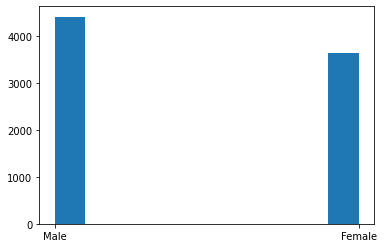

In [51]:
plt.hist(customers['Gender'])

<AxesSubplot:>

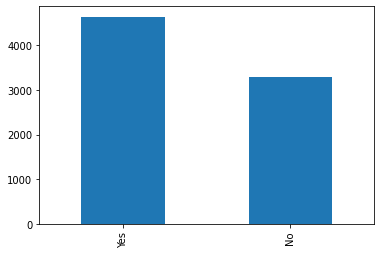

In [93]:
customers['Ever_Married'].value_counts()
customers['Ever_Married'].value_counts().plot(kind='bar')

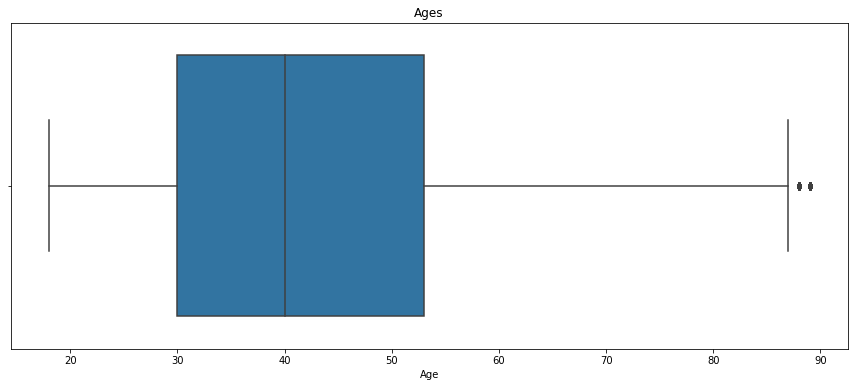

In [125]:
plt.figure(figsize=(15,6))
plt.title("Ages")
sns.boxplot(x=customers["Age"])
plt.show()

<AxesSubplot:>

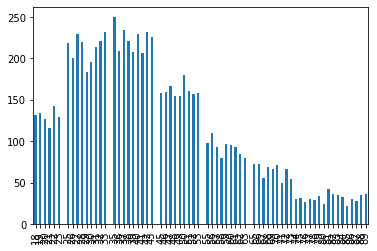

In [145]:
customers['Age'].value_counts().plot(kind='bar')

<AxesSubplot:>

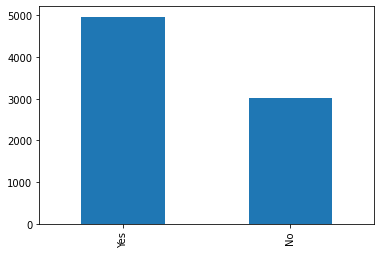

In [91]:
plt.hist(customers['Graduated'].value_counts())
customers['Graduated'].value_counts().plot(kind='bar')

<AxesSubplot:>

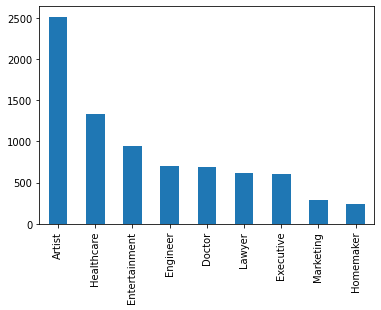

In [94]:
plt.hist(customers['Profession'].value_counts())
customers['Profession'].value_counts().plot(kind='bar')

<AxesSubplot:>

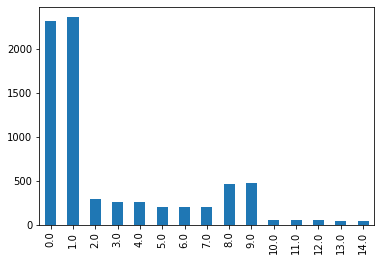

In [95]:
plt.hist(customers['Work_Experience'].value_counts())
customers['Work_Experience'].value_counts().plot(kind='bar')

(array([4878.,    0.,    0.,    0.,    0., 1974.,    0.,    0.,    0.,
        1216.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

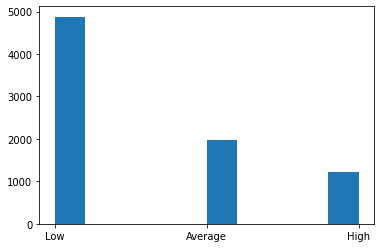

In [103]:
plt.hist(customers['Spending_Score'])

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1453., 2390., 1497., 1379.,    0.,  612.,  212.,   96.,   50.,
          44.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

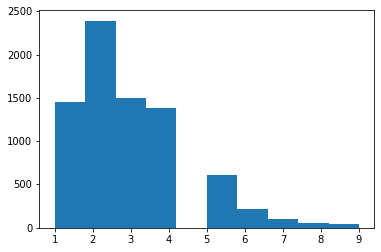

In [105]:
plt.hist(customers['Family_Size'])

(array([2268.,    0.,    0., 1972.,    0.,    0., 1858.,    0.,    0.,
        1970.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

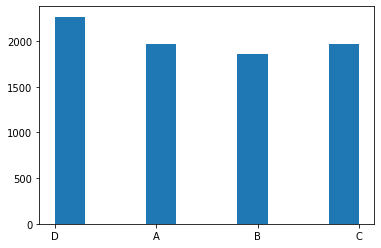

In [59]:
plt.hist(customers['Segmentation'])

In [96]:
customers.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

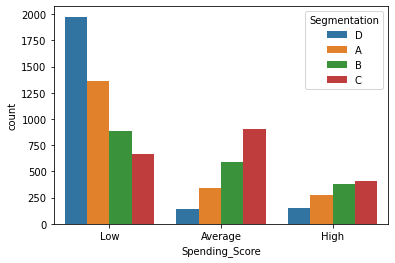

In [106]:
sns.countplot(customers.Spending_Score, hue=customers.Segmentation)

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profession', ylabel='count'>

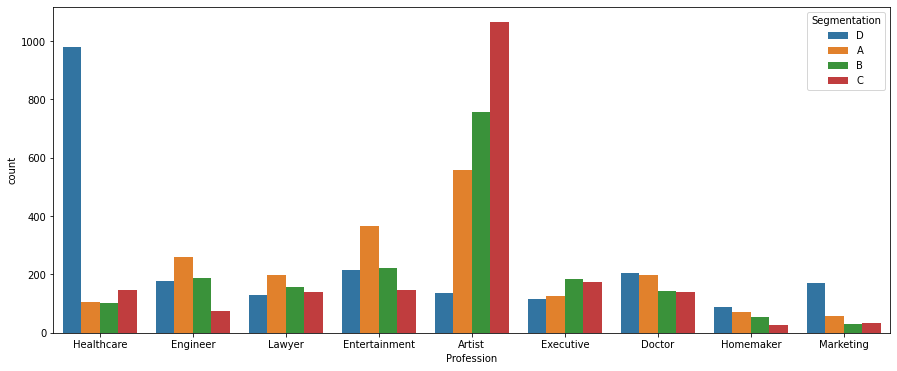

In [130]:
plt.figure(figsize=(15,6))
sns.countplot(customers.Profession, hue=customers.Segmentation)

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ever_Married', ylabel='count'>

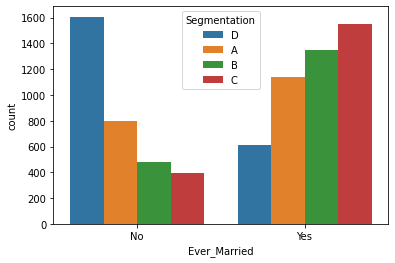

In [112]:
sns.countplot(customers.Ever_Married, hue=customers.Segmentation)

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

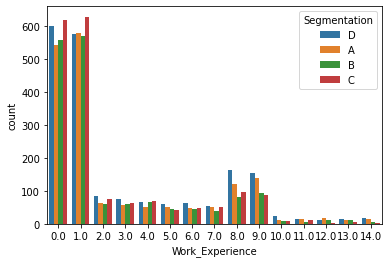

In [127]:
sns.countplot(customers.Work_Experience, hue=customers.Segmentation)

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

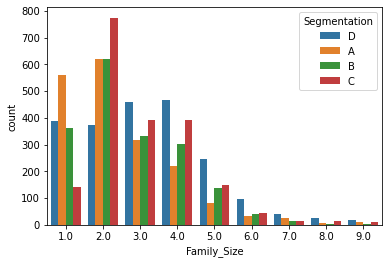

In [128]:
sns.countplot(customers.Family_Size, hue=customers.Segmentation)

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

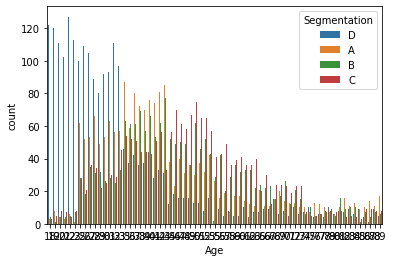

In [137]:
sns.countplot(customers.Age, hue=customers.Segmentation, )

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [211]:
customers_dummies = customers.dropna().drop(columns='Segmentation')
df = pd.get_dummies(customers_dummies, prefix=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'])

df

#ohe = OneHotEncoder()
#ohe.fit(customers_dummies.get_dummies[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']])



,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,22,1.0,4.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,466315,67,1.0,1.0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,461735,67,0.0,2.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
5,461319,56,0.0,2.0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
6,460156,32,1.0,3.0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,41,0.0,5.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
8064,464685,35,3.0,4.0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8065,465406,33,1.0,1.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8066,467299,27,1.0,4.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

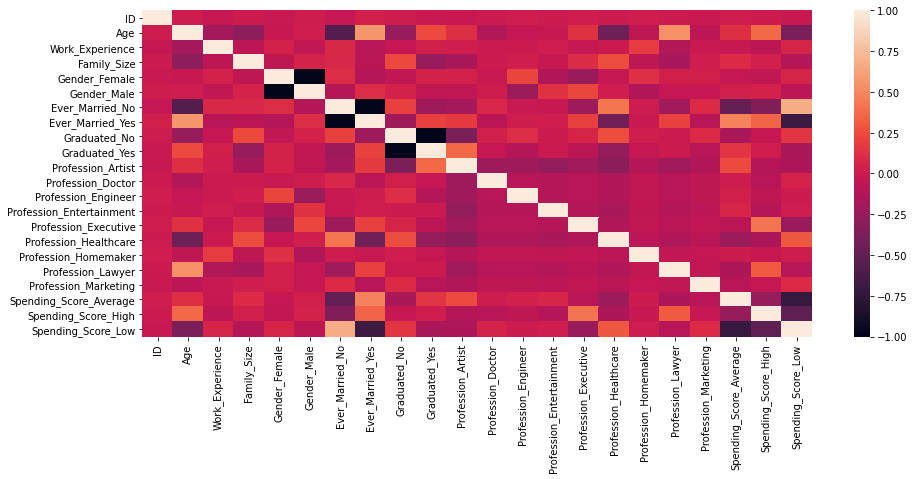

In [212]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

Text(0.5, 0, 'k cluster number')

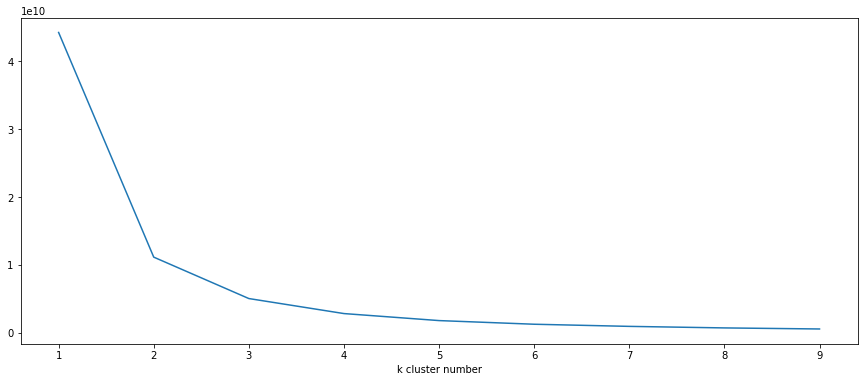

In [213]:
inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(df)
    inertias.append(km_test.inertia_)
plt.figure(figsize=(15,6))
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [217]:
n_clusters = 2

In [218]:
km = KMeans(n_clusters=n_clusters)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending_Score_Low', ylabel='Ever_Married_Yes'>

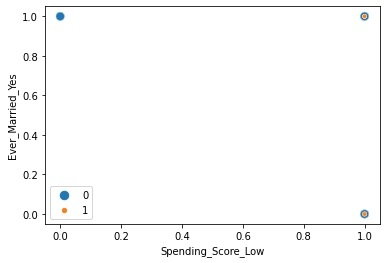

In [221]:
sns.scatterplot(df.Spending_Score_Low, df.Ever_Married_Yes, hue = km.labels_, size= km.labels_)

In [207]:
km.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': None,
 'algorithm': 'auto',
 'cluster_centers_': array([[4.60545364e+05, 4.36570916e+01, 2.78456014e+00, 2.74820467e+00,
         4.55565530e-01, 5.44434470e-01, 4.40754039e-01, 5.59245961e-01,
         3.20466786e-01, 6.79533214e-01, 3.52333932e-01, 9.20107720e-02,
         6.59784560e-02, 1.26122083e-01, 5.70017953e-02, 1.63824057e-01,
         1.97486535e-02, 8.34829443e-02, 3.94973070e-02, 2.27109515e-01,
         1.44075404e-01, 6.28815081e-01, 2.42369838e-01, 2.23518851e-01,
         2.58976661e-01, 2.75134650e-01],
        [4.66450061e+05, 4.45568783e+01, 2.60449735e+00, 2.75264550e+00,
         4.41798942e-01, 5.58201058e-01, 3.89770723e-01, 6.10229277e-01,
         3.39947090e-01, 6.60052910e-01, 3.27601411e-01, 8.02469136e-02,
         7.49559083e-02, 1.30070547e-01, 8.28924162e-02, 1.644620

In [208]:
scaler = StandardScaler()

In [209]:
df_2 = pd.DataFrame(scaler.fit_transform(df))
df_2.columns = df.columns
df_2

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,-0.275767,-1.303562,-0.478692,0.760391,-0.902604,0.902604,1.203804,-1.203804,1.324114,-1.324114,...,-0.164976,-0.284488,-0.18955,-0.576777,-0.421138,0.816952,-0.565546,-0.555227,-0.590071,1.670687
1,1.090654,1.421748,-0.478692,-1.209140,1.107905,-1.107905,-0.830700,0.830700,-0.755222,0.755222,...,-0.164976,-0.284488,-0.18955,-0.576777,-0.421138,0.816952,-0.565546,1.801067,-0.590071,-0.598556
2,-0.694346,1.421748,-0.772431,-0.552630,-0.902604,0.902604,-0.830700,0.830700,-0.755222,0.755222,...,-0.164976,3.515091,-0.18955,-0.576777,2.374519,-1.224061,-0.565546,1.801067,-0.590071,-0.598556
3,-0.856477,0.755561,-0.772431,-0.552630,-0.902604,0.902604,-0.830700,0.830700,1.324114,-1.324114,...,-0.164976,-0.284488,-0.18955,1.733771,-0.421138,-1.224061,-0.565546,-0.555227,1.694711,-0.598556
4,-1.309742,-0.697937,-0.478692,0.103881,-0.902604,0.902604,1.203804,-1.203804,-0.755222,0.755222,...,-0.164976,-0.284488,-0.18955,-0.576777,-0.421138,0.816952,-0.565546,-0.555227,1.694711,-0.598556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,-0.200548,-0.152876,-0.772431,1.416901,-0.902604,0.902604,-0.830700,0.830700,-0.755222,0.755222,...,-0.164976,-0.284488,-0.18955,-0.576777,2.374519,-1.224061,-0.565546,1.801067,-0.590071,-0.598556
6714,0.455381,-0.516250,0.108786,0.760391,-0.902604,0.902604,1.203804,-1.203804,1.324114,-1.324114,...,-0.164976,-0.284488,-0.18955,-0.576777,-0.421138,0.816952,-0.565546,-0.555227,-0.590071,1.670687
6715,0.736382,-0.637375,-0.478692,-1.209140,1.107905,-1.107905,1.203804,-1.203804,-0.755222,0.755222,...,-0.164976,-0.284488,-0.18955,-0.576777,-0.421138,0.816952,-0.565546,-0.555227,-0.590071,1.670687
6716,1.474156,-1.000750,-0.478692,0.760391,1.107905,-1.107905,1.203804,-1.203804,-0.755222,0.755222,...,-0.164976,-0.284488,-0.18955,-0.576777,-0.421138,0.816952,-0.565546,1.801067,-0.590071,-0.598556


/Users/guillaume/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Family_Size'>

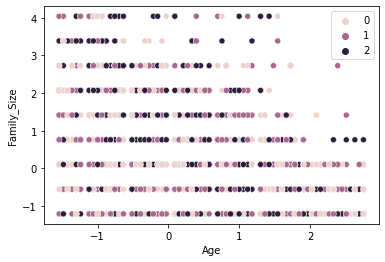

In [210]:
sns.scatterplot(df_2.Age, df_2.Family_Size, hue = km.labels_)

**💾 Save your results**

Run the following cell to save your results.

In [155]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [223]:
# Load the data and display the first rows
segment_d_vs_all = pd.read_csv('data/customers_encoded.csv')
segment_d_vs_all.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

In [241]:
d_pop = segment_d_vs_all[segment_d_vs_all['is_D']==1]
other_pop = segment_d_vs_all[segment_d_vs_all['is_D']==0]
mean_d_pop = d_pop['Age'].mean()
mean_pop =  segment_d_vs_all['Age'].mean()
std_pop = np.std(segment_d_vs_all['Age'])
n_d_pop = len(d_pop)
mean_d_pop, mean_pop, std_pop, n_d_pop

(33.39021164021164, 43.46690629647992, 16.71066060886805, 2268)

In [262]:
# Test
H0 = "moyenne de la classe D est la même que celle de la population globale"
H1 = "la moyenne de d'age de la classe D est plus basse" 
X = norm(mean_pop, std_pop / (n_d_pop**0.5))
X

In [264]:
# p_value
from scipy.stats import norm
p_value = X.cdf(mean_d_pop)
p_value

1.1549213413027624e-181

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [265]:
# odds
odds = n_d_pop / len(segment_d_vs_all)
odds

0.2811105602379772

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [273]:
# odds_variation
married = segment_d_vs_all[segment_d_vs_all['Ever_Married']=='Yes']
married_and_graduated = married[married['Graduated']=='Yes']
d_m_and_g = married_and_graduated[married_and_graduated['is_D']==1]
#odds_variation = 

odds_variation = len(d_m_and_g) / len(married_and_graduated)
odds_variation

0.08425925925925926

####  💾 Save your results

Run the following cell to save your results.

In [ ]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**